In [2]:
##
# Zhuolun Li
# zl2501
##
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.decomposition as skd

## 6.

In [3]:
A = np.asarray([[0, 14],[6,9]])
print(A)
W, v = np.linalg.eig(A)
print(W)
print(v)

[[ 0 14]
 [ 6  9]]
[-5.71028893 14.71028893]
[[-0.9259401  -0.6894021 ]
 [ 0.37767039 -0.72437887]]


## 7.

In [4]:
m = [[5,2,4],
    [9,6,4],
    [7,1,0],
    [2,5,6]]
m = np.asarray(m)
mean = m.mean(axis= 0)
B = (m-mean)
print(B)
cov_m = np.cov((m-mean).T)
print(cov_m)
W,v = np.linalg.eig(cov_m)
print(W)
print(v)

[[-0.75 -1.5   0.5 ]
 [ 3.25  2.5   0.5 ]
 [ 1.25 -2.5  -3.5 ]
 [-3.75  1.5   2.5 ]]
[[ 8.91666667  0.16666667 -4.16666667]
 [ 0.16666667  5.66666667  4.33333333]
 [-4.16666667  4.33333333  6.33333333]]
[ 0.49703343 12.97881887  7.44081437]
[[ 0.36257431 -0.65675377  0.66122187]
 [-0.60552156  0.3733234   0.70283233]
 [ 0.70843738  0.65521304  0.26232109]]


### (d)

In [5]:
X = B
pca = skd.PCA(n_components=3)
skd.PCA.fit(pca, X)
W1 = pca.components_
W = W1.transpose()
Z = pca.transform(X)
print(Z[:,:2])

[[ 0.26018674 -1.41900435]
 [-0.87353472  4.03721245]
 [-4.04749635 -1.8486773 ]
 [ 4.66084433 -0.7695308 ]]


## 8.

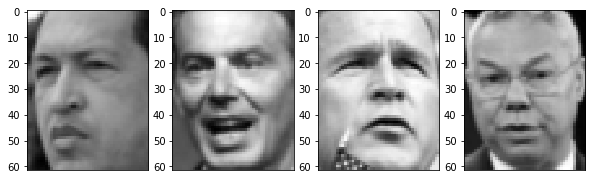

In [6]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70)
n_samples, h, w =lfw_people.images.shape
npix = h*w
fea = lfw_people.data

def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

plt.figure(figsize=(10,20))
nplt = 4
for i in range(nplt):
    plt.subplot(1, nplt, i+1)
    plt_face(fea[i])

plt.show()
    

## 8.
### (a)

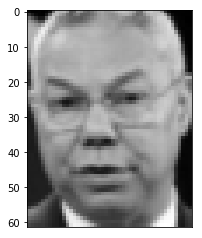

In [7]:
plt_face(fea[3])
plt.show()

### (b)

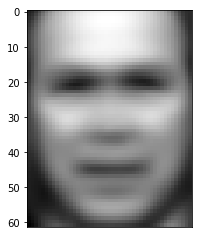

In [8]:
mean_face = fea.mean(axis=0)
plt_face(mean_face)
plt.show()

### (c)

In [9]:
pca = skd.PCA(n_components=5)
pca.fit(fea)
Z = pca.transform(fea)
print(Z[3])

[ 202.54233  -261.477     418.9741    -29.398376   39.785408]


### (d)

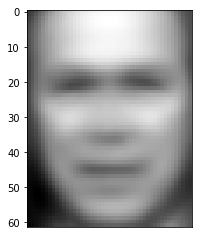

In [10]:
pca = skd.PCA(n_components=5)
pca.fit(fea)
Z = pca.transform(fea)
W = pca.components_
fea_hat = Z@W + mean_face
plt_face(fea_hat[3])
plt.show()

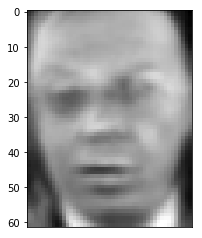

In [11]:
pca = skd.PCA(n_components=50)
pca.fit(fea)
Z = pca.transform(fea)
W = pca.components_
fea_hat = Z@W + mean_face
plt_face(fea_hat[3])
plt.show()